          date        county         state   fips   cases  deaths
0   10/16/2022         Adams  Pennsylvania  42001   29031     395
1   10/16/2022     Allegheny  Pennsylvania  42003  320559    3567
2   10/16/2022     Armstrong  Pennsylvania  42005   17323     372
3   10/16/2022        Beaver  Pennsylvania  42007   46424     781
4   10/16/2022       Bedford  Pennsylvania  42009   12241     283
..         ...           ...           ...    ...     ...     ...
62  10/16/2022    Washington  Pennsylvania  42125   60439     691
63  10/16/2022         Wayne  Pennsylvania  42127   12129     183
64  10/16/2022  Westmoreland  Pennsylvania  42129   93270    1470
65  10/16/2022       Wyoming  Pennsylvania  42131    6076     115
66  10/16/2022          York  Pennsylvania  42133  137108    1582

[67 rows x 6 columns]


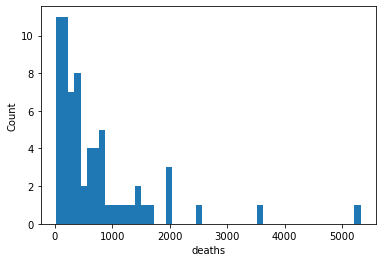

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import random

file='us-counties-2022.csv'
dat=pd.read_csv(file, header=0)
print(dat)


plt.figure(1)
deaths=np.array(dat['deaths'])
plt.hist(deaths, bins=50);
plt.xlabel("deaths");
plt.ylabel("Count");


# plt.figure(2)
# plt.hist(t, bins = 100);
# plt.xlabel("t statistic");
# plt.ylabel("count");




In [22]:
file='Poverty Pennsylvania.csv'
dat=pd.read_csv(file, header=0)
# print(dat)
shape=dat.shape
print(shape)

pop=np.array(dat.iloc[0][1])
print(pop)

male=np.array(dat.iloc[2][1])
print(male)

pov=np.array(dat.iloc[0][5])
print(pov)

# for i<shape:
    
# file='Poverty Allegheny County.csv'
# dat=pd.read_csv(file, header=0)
# # print(dat)
# pov=np.array(dat.iloc[0][5])
# print(pov)

# file='Poverty Washington County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Westmoreland County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Beaver County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Butler County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Philadelphia County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Bucks County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Delaware County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Chester County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)

# file='Poverty Montgomery County.csv'
# dat=pd.read_csv(file, header=0)
# pov=np.append([pov],[dat.iloc[0][5]])
# print(pov)


# plt.figure(1)
# plt.hist(pov, bins=50);
# plt.xlabel("Percent Below Poverty Level %");
# plt.ylabel("Count");


(43, 235)
100,189
49,483
8.70%


In [14]:
file='Poverty Allegheny County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Washington County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Westmoreland County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Beaver County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Butler County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Philadelphia County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Bucks County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Delaware County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Chester County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

file='Poverty Montgomery County.csv'
dat=pd.read_csv(file, header=0)
# print(dat)

male=np.array(dat.iloc[12][1])
female=np.array(dat.iloc[13][1])
print(male)
print(female)

male=(male/(male+female)*100)
female=(female/(male+female)*100)
print(male)
print(female)

plt.figure(1)
plt.hist(male, bins=50);
plt.xlabel("Percent Male %");
plt.ylabel("Count");

plt.figure(2)
plt.hist(female, bins=50);
plt.xlabel("Percent Female %");
plt.ylabel("Count");

588,870
616,981


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U7'), dtype('<U7')) -> None